In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import plotly.graph_objects as go

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


### FACT 1: NETFLIX WAS ORIGINALLY CALLED KIBBLE.

In [2]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
df.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [5]:
netflix_shows=df[df['type']=='TV Show']

In [6]:
netflix_movies=df[df['type']=='Movie']

In [7]:
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 6234 rows and 12 columns in the dataset.


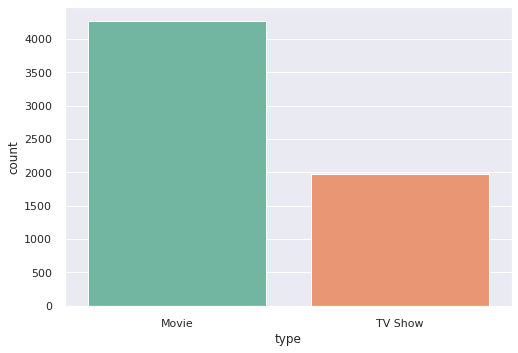

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

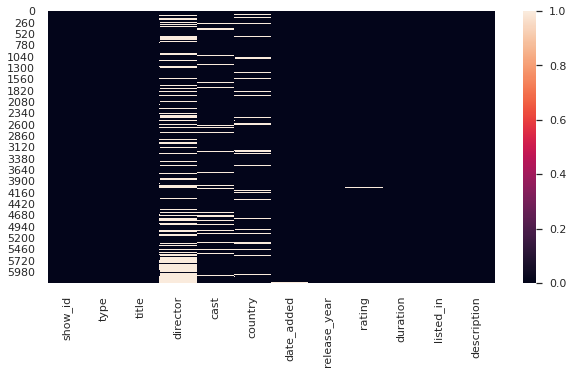

director's null rate :31.58%
cast's null rate :9.14%
country's null rate :7.64%
date_added's null rate :0.18%
rating's null rate :0.16%


In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

In [10]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

# Droping the column 'date_added' as it we have seperate columns for 'year_added' and 'month_added'

df.drop('date_added',axis=1,inplace=True)

### Movie ratings analysis

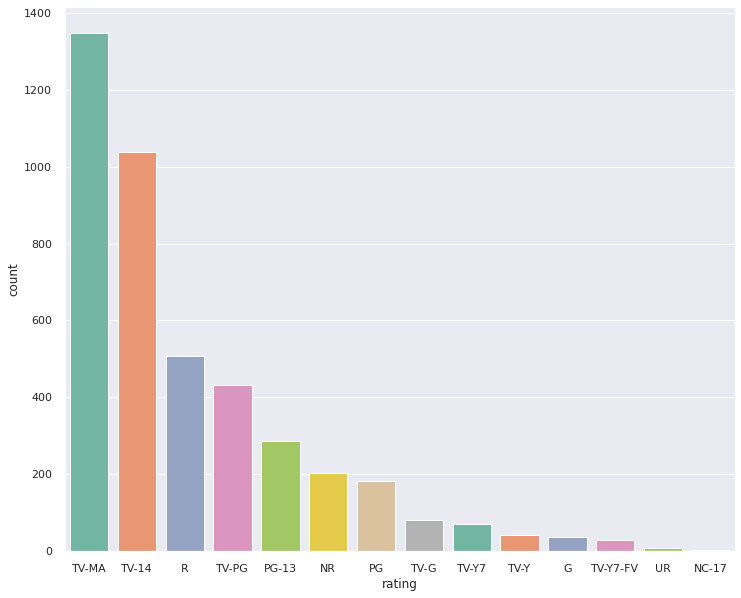

In [11]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

### Content type on Netflix:

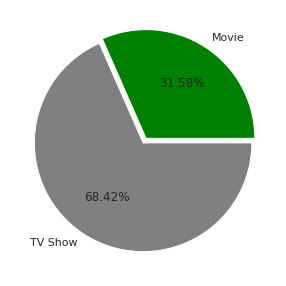

In [12]:
plt.figure(figsize=(10,5))
plt.pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Green','grey'])
plt.show()

In [13]:
df['country'].value_counts()

United States                                   2032
India                                            777
United Kingdom                                   348
Japan                                            176
Canada                                           141
                                                ... 
United States, France, United Kingdom, Japan       1
Spain, United Kingdom, United States               1
Switzerland, France                                1
United States, Israel, Italy, South Africa         1
Mauritius, South Africa                            1
Name: country, Length: 554, dtype: int64

In [14]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [15]:
df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

* The growth in number of movies on netflix is much higher than that of TV shows
* About 1200 new movies were added in both 2018 and 2019
* The growth in content started from 2013

In [16]:
df_content = df[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv2 = df_tv[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_tv2['percent'] = df_tv2['count'].apply(lambda x : 100*x/sum(df_tv2['count']))


df_movies2 = df_movies[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_movies2['percent'] = df_movies2['count'].apply(lambda x : 100*x/sum(df_movies2['count']))

t1 = go.Scatter(x=df_movies2['month_name_added'], y=df_movies2["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv2['month_name_added'], y=df_tv2["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['month_name_added'], y=df_content["count"], name="Total Contents", marker=dict(color="Brown"))


data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


* The growth in contents are higher in the first three months and the last three months of the year.
* Least* number of contents are added in the month of February**.

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer 

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
                     cbar_kws={"shrink": 0.6})
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


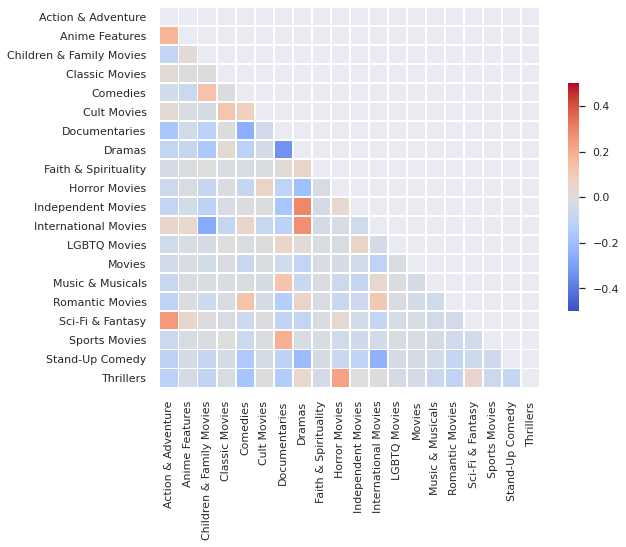

In [18]:
relation_heatmap(df_movies, 'Movie')

* The negative relationship between drama and documentary is remarkable.
* We can see that there are many dramas for independent and international films.
* And also Sci-Fi & Fantasy for action & Adventure.

There are 22 types in the Netflix TV Show Dataset


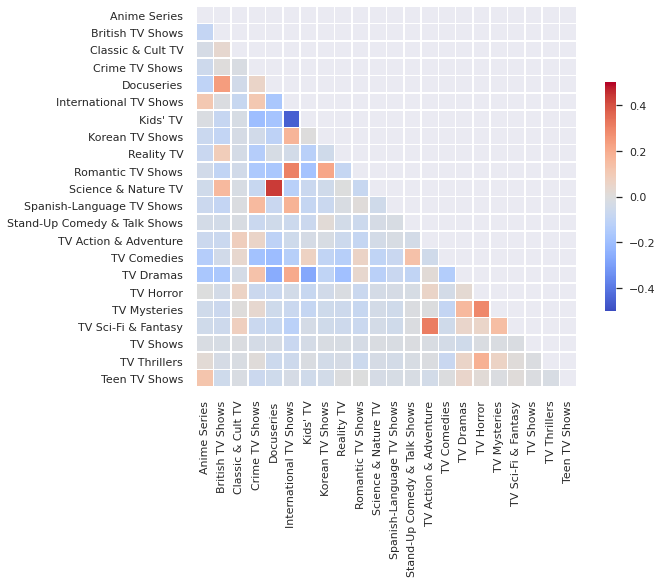

In [19]:
relation_heatmap(df_tv, 'TV Show')

### FACT 2: THE FIRST "NETFLIX ORIGINAL" WAS AN ABSTRACT TEST FOOTAGE SHORT.

## Rating distribution:

In [20]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']

In [21]:
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

In [22]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

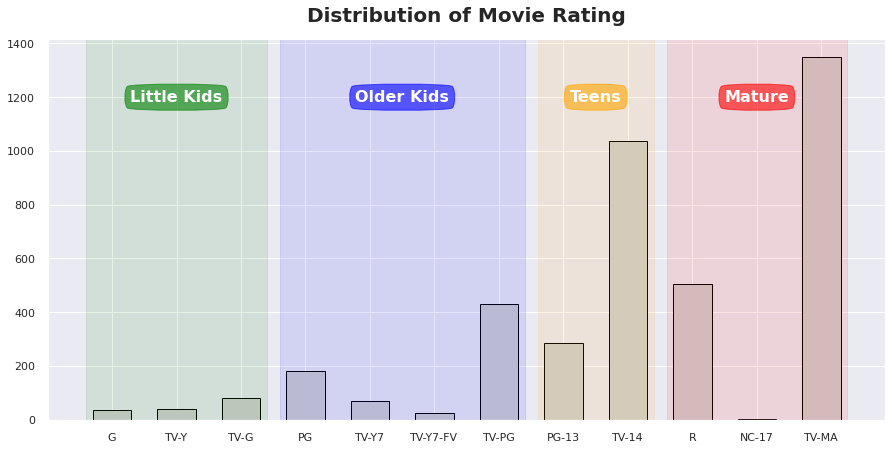

In [23]:
rating_barplot(movie_rating,'Movie', 1200)

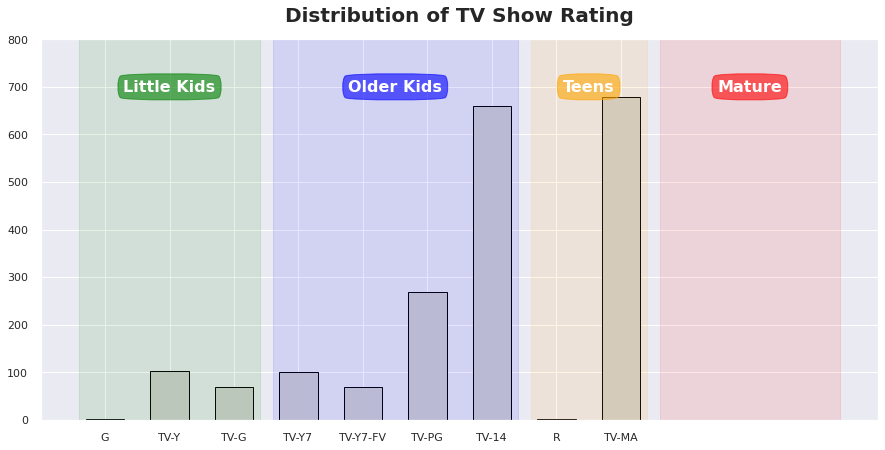

In [24]:
rating_barplot(tv_rating,'TV Show' , 700, 800)

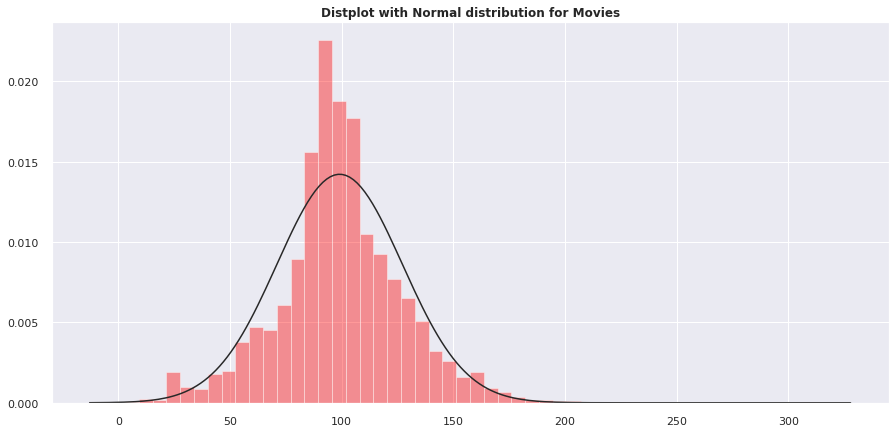

In [25]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

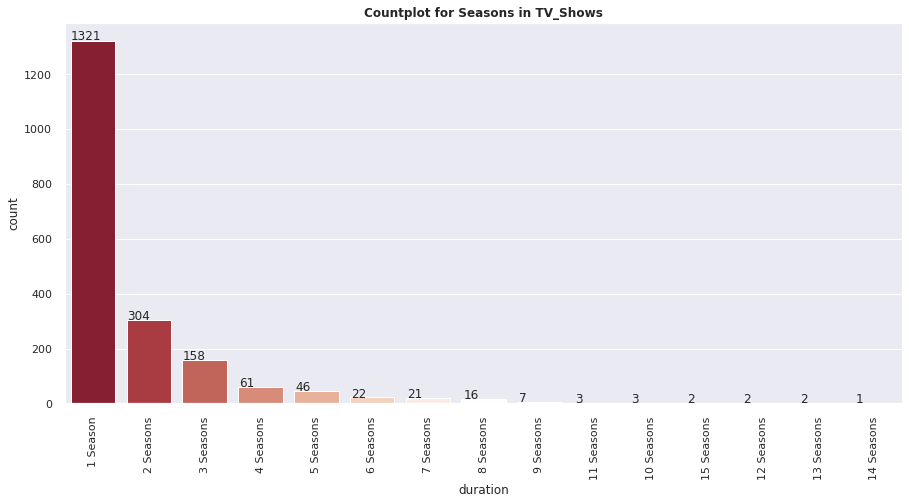

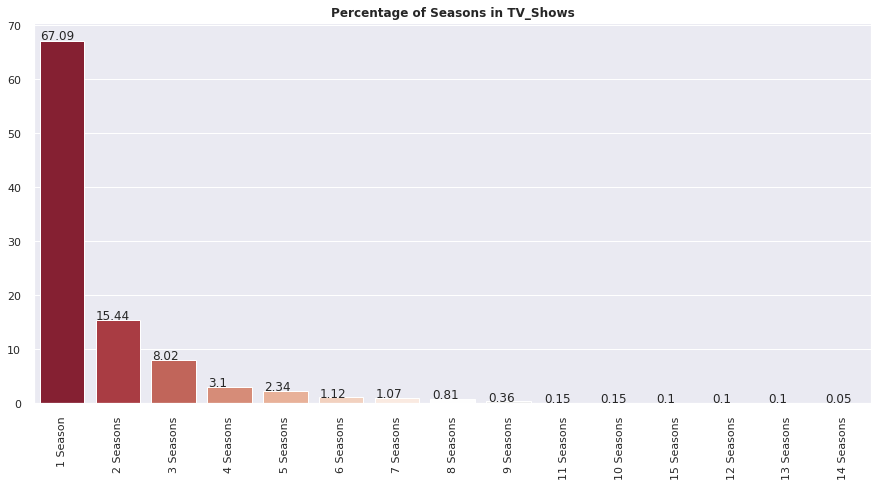

In [26]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_tv['duration'],order = df_tv['duration'].value_counts().index,palette="RdGy")
plt.title('Countplot for Seasons in TV_Shows',fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))

plt.figure(figsize=(15,7))
ax = sns.barplot(x=((df_tv['duration'].value_counts()/df_tv.shape[0])*100).index,
                 y=round(((df_tv['duration'].value_counts()/df_tv.shape[0])*100),2).values,
                 palette="RdGy")
plt.title('Percentage of Seasons in TV_Shows',fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))
plt.show()

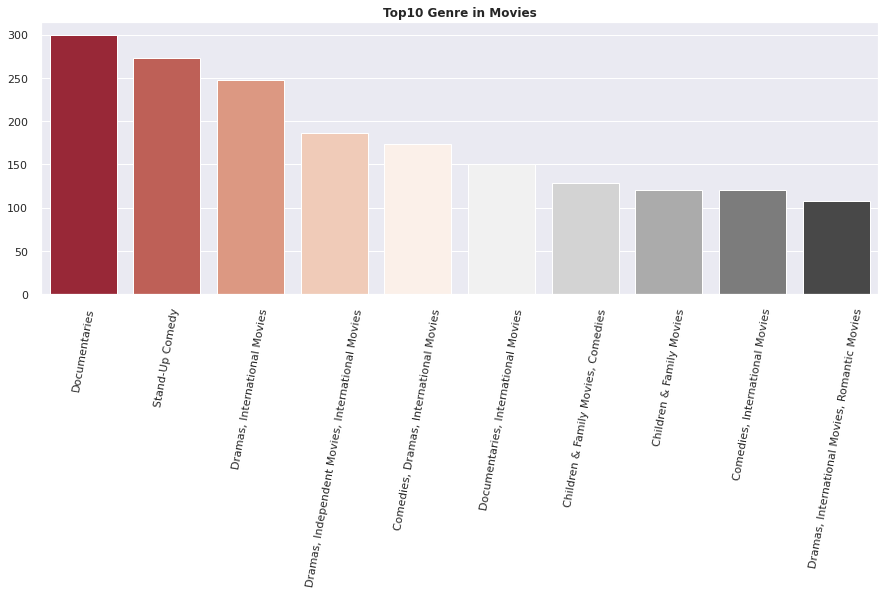

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

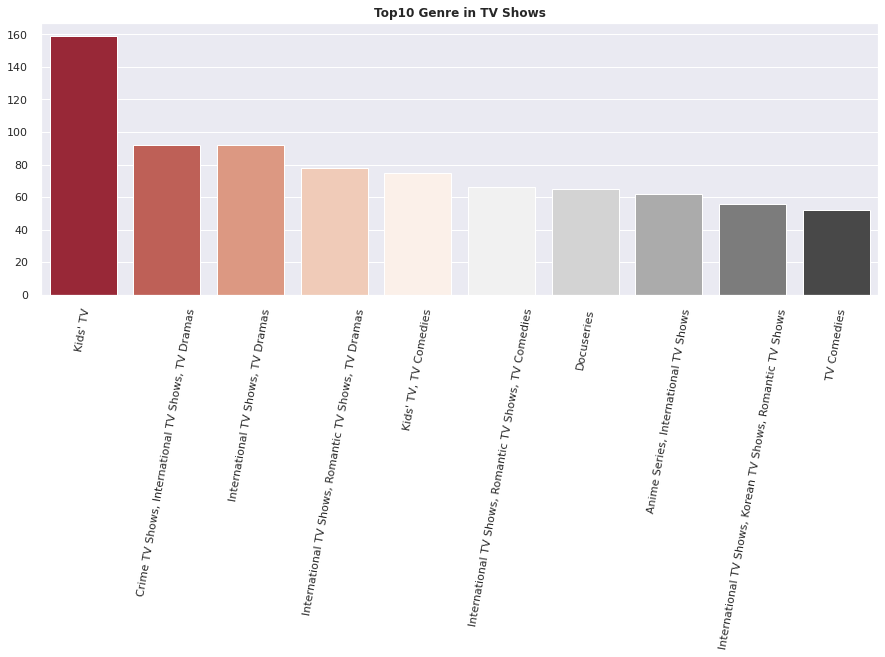

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

### Analysis of TV SERIES on Netflix

In [29]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [30]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

Text(0, 0.5, 'Arrival delay (in minutes)')

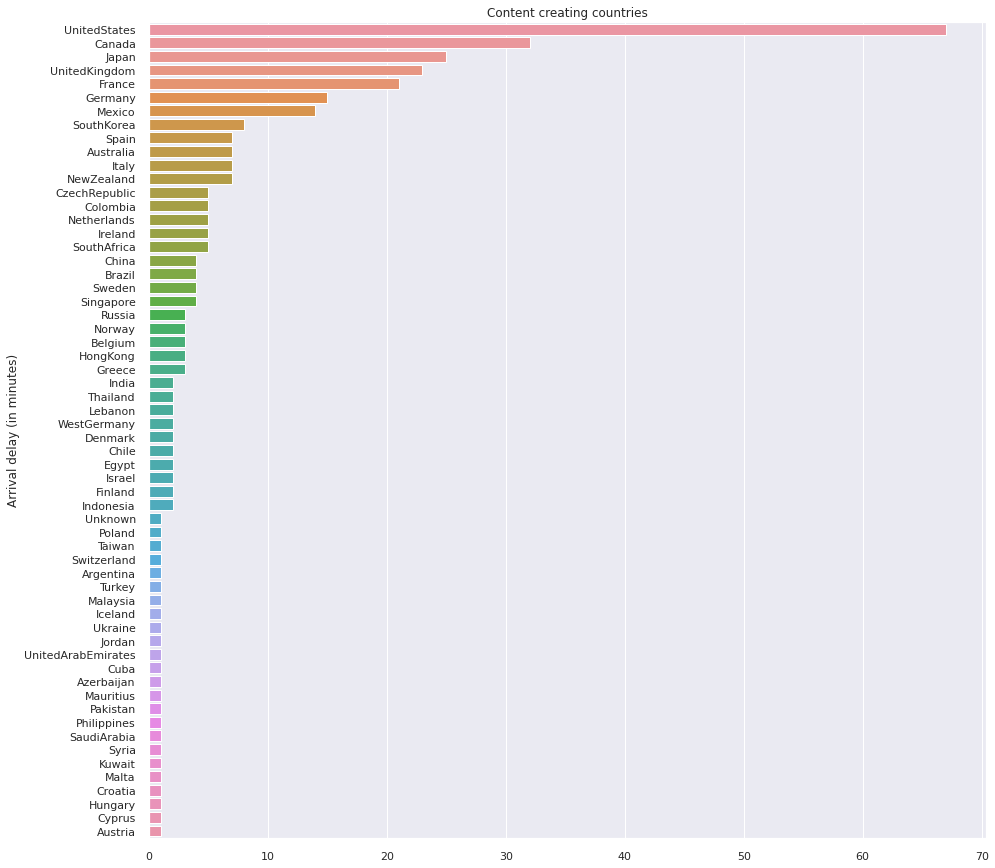

In [31]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

In [32]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [33]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [34]:
t=['title','no_of_seasons']
top=durations[t]

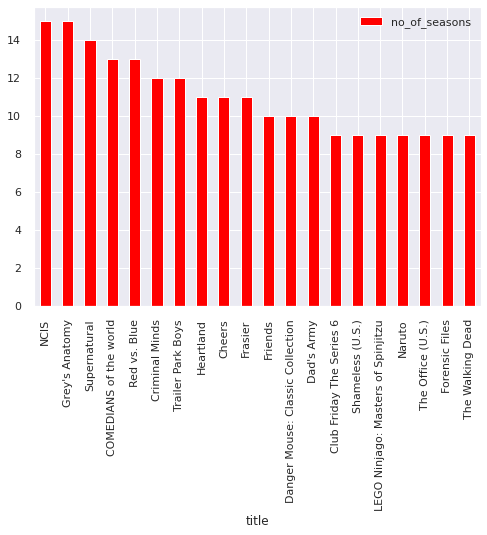

In [35]:
top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

In [36]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

In [37]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show()

In [38]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

**The above mentioned are latest released US-television shows!**

### Content in Germany

In [39]:
netflix_ger=df[df['country']=='Germany']
nannefg=netflix_ger.dropna()
import plotly.express as px
fig = px.treemap(nannefg, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

In [40]:
newest_ger_series=netflix_ger.sort_values(by='release_year', ascending=False)[0:20]
newest_ger_series

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
2431,80202465,Movie,"Berlin, I Love You",NaN,NaN,Germany,2019,R,120 min,"Dramas, International Movies, Romantic Movies","Set in the Grey City, this ""Cities of Love"" in...",6.0,June,2019.0
1174,81011957,TV Show,Holiday Secrets,NaN,"Corinna Harfouch, Christiane Paul, Svenja Jung...",Germany,2019,TV-MA,1 Season,"International TV Shows, TV Dramas",A Christmas reunion becomes a gateway to the p...,11.0,November,2019.0
5464,81021447,Movie,The Silence,John R. Leonetti,"Stanley Tucci, Kiernan Shipka, Miranda Otto, K...",Germany,2019,TV-14,91 min,"Horror Movies, Thrillers",With the world under attack by deadly creature...,4.0,April,2019.0
1604,80218448,TV Show,How to Sell Drugs Online (Fast),NaN,"Maximilian Mundt, Danilo Kamperidis, Lena Klen...",Germany,2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Com...","To win back his ex-girlfriend, a nerdy teen st...",5.0,May,2019.0
3010,81044248,Movie,Kidnapping Stella,Thomas Sieben,"Max von der Groeben, Jella Haase, Clemens Schick",Germany,2019,TV-MA,90 min,"Dramas, International Movies, Thrillers","Snatched off the street and held for ransom, a...",7.0,July,2019.0
2444,81051688,Movie,Rock My Heart,Hanno Olderdissen,"Lena Klenke, Dieter Hallervorden, Emilio Sakra...",Germany,2019,TV-PG,110 min,"Children & Family Movies, Dramas, Internationa...",After an adventurous teen with a heart defect ...,6.0,June,2019.0
2453,81030855,Movie,Alles ist gut,Eva Trobisch,"Aenne Schwarz, Andreas Döhler, Hans Löw, Tilo ...",Germany,2019,TV-MA,90 min,"Dramas, International Movies",A woman sexually assaulted by her new boss's b...,6.0,June,2019.0
4394,80200596,TV Show,Perfume,NaN,"Friederike Becht, August Diehl, Wotan Wilke Mö...",Germany,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","When a singer is found murdered, with her scen...",12.0,December,2018.0
5293,80217772,Movie,Enissa Amani: Ehrenwort,Max Amini,Enissa Amani,Germany,2018,TV-MA,66 min,Stand-Up Comedy,"Live from Hamburg, Iranian-German comedian Eni...",4.0,April,2018.0
4119,80189522,TV Show,Dogs of Berlin,NaN,"Felix Kramer, Fahri Yardim, Anna Maria Mühe, K...",Germany,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Two cops investigate the murder of a famous Tu...,12.0,December,2018.0


In [41]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_ger_series['title'],newest_ger_series['release_year']]))
                     ])
fig.show()

### Top Duration

In [42]:
topdirs=pd.value_counts(df['duration'])
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

**It can be inferred that having one season is the most preferred duration**

## Content-Based Recommendation System

![](https://i.ibb.co/S5GWr1r/Content-recommendation.png)
TF-IDF(Term Frequency-Inverse Document Frequency) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. 

This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(6234, 16151)

There are about 16151 words described for the 6234 movies in this dataset.

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d)

In [44]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [45]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [46]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [47]:
get_recommendations('Peaky Blinders')

296                     Our Godfather
4491                              Don
2015                         The Fear
4852    Jonathan Strange & Mr Norrell
1231                       The Prison
3737                Power Rangers Zeo
5986                       The Tudors
1753      Once Upon a Time in Mumbaai
5494     The Legend of Michael Mishra
1142                  Shelby American
Name: title, dtype: object

### This recommendation is just based on the Plot.

In [48]:
get_recommendations('Mortel')

3016                  PILI Fantasy: War of Dragons
5688         Edgar Rice Burroughs' Tarzan and Jane
4401                             Figures of Speech
2001                                     FirstBorn
3310    My Entire High School Sinking Into the Sea
5307                                 Psychokinesis
4332                                At First Light
3955                          The Umbrella Academy
1761                                     Chamatkar
5421                              Maharakshak Devi
Name: title, dtype: object

## Content-Based Filtering on multiple metrics

### Content based filtering on the following factors:

1. Title
1. Cast
1. Director
1. Listed in
1. Plot
1. Filling null values with empty string.

In [49]:
filledna=df.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,September,2019
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,September,2016


In [50]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [51]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,normofthenorth:kingsizedadventure,"richardfinn,timmaltby","alanmarriott,andrewtoth,briandobson,colehoward...","children&familymovies,comedies",beforeplanninganawesomeweddingforhisgrandfathe...
1,jandino:whateverittakes,,jandinoasporaat,stand-upcomedy,jandinoasporaatriffsonthechallengesofraisingki...


### Creating a "soup" or a "bag of words" for all rows.

In [52]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [53]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [55]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [56]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [57]:
get_recommendations_new('PK', cosine_sim2)

5054                           3 Idiots
5494       The Legend of Michael Mishra
3093                  Anthony Kaun Hai?
2196                             Haapus
691                               Sanju
4110                   Taare Zameen Par
1449                    Chance Pe Dance
2194                    Chal Dhar Pakad
1746    EMI: Liya Hai To Chukana Padega
4920                   Khosla Ka Ghosla
Name: title, dtype: object

In [58]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3465                                   Giri / Haji
6050                   The Frankenstein Chronicles
2018                         The Murder Detectives
5529                                        Loaded
550                                      Bodyguard
2505                                 Kiss Me First
5859                                  Happy Valley
233     How to Live Mortgage Free with Sarah Beeny
522                          Terrorism Close Calls
1605                                Killer Ratings
Name: title, dtype: object

In [59]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

2576                     Melodies of Life - Born This Way
5273                                       Dancing Angels
5708                                        Little Things
2210                                           Rishta.com
5441    Club Friday To Be Continued - My Beautiful Tomboy
1155                                          Oh My Ghost
625                                  Accidentally in Love
789                                       College Romance
2030                                  แผนร้ายนายเจ้าเล่ห์
2480                                    Bangkok Bachelors
Name: title, dtype: object